# **Multiclass Tweet Classification Using Bidirectional LSTM/GRU with Skip Connections **
# **Τεχνητή Νοημοσύνη 2**
#**Εργασία 3**
Στέφανος Μπακλαβάς 1115201700093


In [2]:
#change the following lines in order to change test and validation sets


from google.colab import drive
drive.mount("/content/drive")

import nltk
nltk.download('stopwords')
!pip install --upgrade gensim
!pip install python-Levenshtein


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


!pip install beautifulsoup4
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from datetime import datetime

from bs4 import BeautifulSoup

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import f1_score



!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip
%matplotlib inline 


Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/gensim-4.1.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


     |████████████████████████████████| 50 kB 4.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149871 sha256=c7ade4dfd984146e76e3f96973969624ae401f766340186d5bafc3a07f1c0e36
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/python_Levenshtein-0.12.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


--2022-01-30 18:52:15--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-01-30 18:52:15--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.20MB/s    in 4m 47s  

2022-01-30 18:57:02 (5.05 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.2

In [3]:

!pip install torchvision 

import torch
import torchvision

In [5]:
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from datetime import datetime
import gensim


from bs4 import BeautifulSoup

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import f1_score
vaccine_train_set = r'/content/drive/MyDrive/Colab Notebooks/AI_2/AI_2_HW1/vaccine_train_set.csv'
vaccine_validation_set = r'/content/drive/MyDrive/Colab Notebooks/AI_2/AI_2_HW1/vaccine_validation_set.csv'


## Reading the datasets


In [6]:
df_train = pd.read_csv(vaccine_train_set)
df_validation = pd.read_csv(vaccine_validation_set)


## Data Pre-processing


Παρακάτω γίνεται η εξής προεπεξεργασία στα δεδομένα:

1.   Απαλοιφή των σημείων στίξης και διάφορων άλλων χαρακτήρων
2.   Καθαρισμός των πολλών κενών διαστημάτων και αντικατάστασή τους με ένα κενό
3.   Μετατροπή όλων των γραμμάτων σε πεζά



Είχε δοκιμαστεί και stemming αλλά δεν λειτούργησε καλύτερα.Επίσης δοκιμάστηκε να αφαιρεθούν τα emogis όμως με την τρέχουσα προεπεξεργασία αφαιρούνται έτσι κι αλλιώς.Για το λόγο αυτό οι γραμμές αυτές είναι σχολιασμένες 


In [7]:
from nltk.stem.snowball import SnowballStemmer
import re

stemmer = SnowballStemmer("english")


df_train['tweet'] = df_train['tweet'].str.translate({ord(i): " " for i in ',–#%$&*()@''-‘"":.!?/'})
df_train.columns = df_train.columns.str.replace('  ', ' ')
df_train['tweet'] = df_train['tweet'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df_train['tweet'] = df_train['tweet'].str.lower()
#df_train['tweet'] = df_train['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])
#df_train['tweet'] = df_train['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#df_train['tweet'] = df_train['tweet'].str.replace('\d+', '')


df_validation['tweet'] = df_validation['tweet'].str.translate({ord(i): " " for i in ',–#%$&*()@''-‘"":.!?/'})
df_validation.columns = df_validation.columns.str.replace('  ', ' ')
df_validation['tweet'] = df_validation['tweet'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df_validation['tweet'] = df_validation['tweet'].str.lower()
#df_validation['tweet'] = df_validation['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])
#df_validation['tweet'] = df_validation['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#df_validation['tweet'] = df_validation['tweet'].str.replace('\d+', '')



Διάβασμα των embeddings και δημιουργία του vocabulary.Στην συγκεκριμένη εργασία δεν χρησιμοποιήθηκε empedding layer , αλλά τα embeddings δημιουργούνται όπως και στην προηγούμενη καθώς διάφορα άρθρα συμπαίρεναν ότι έτσι έχουμε λίγο καλύτερη απόδοση.
Ένα τέτοιο άρθρο είναι το εξής:

https://towardsdatascience.com/pre-trained-word-embeddings-or-embedding-layer-a-dilemma-8406959fd76c

In [8]:
glove = pd.read_csv('glove.twitter.27B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)


In [9]:
glove_embedding = {key: val.values for key, val in glove.T.items()}


In [10]:

def create_tweets_average_vectors(df,glove_embedding,dimension):  
  
  tweets_vector = []
  counter1 = 0
  counter2 = 0
  for tweet in df['tweet']:
    l = []
    for word in tweet:
      if word in glove_embedding.keys():
        val = glove_embedding[word]
        l.append(val)
        counter1=counter1+1
      else: 
        if len(l) != 0:
          avg = np.array(l)  
          avg = np.average(avg,axis=0)
          l.append(avg)
          counter2 = counter2+1
        else:
          l.append(np.zeros(dimension)) 
    
    #n = np.array(l)  
    #n = np.average(n,axis=0)
    tweets_vector.append(l)

  return tweets_vector    




train_tweets_vector = create_tweets_average_vectors(df_train,glove_embedding,50)
validation_tweets_vector = create_tweets_average_vectors(df_validation,glove_embedding,50)



Αφού κάθε πρόταση θα γίνει padded από εμάς δεν δημιουργούμε ακόμα tensors. Συγκεκριμένα κάθε tweet πλέον αποτελείται από τα embeddings των λέξεων που περιέχει ενώ το padding θα γίνει με τον dataloader με την χρήση της συνάρτησης collate_fn2 που φτιάχτηκε

In [11]:
X_train = train_tweets_vector
X_validation = validation_tweets_vector

y_train = df_train['label']
y_validation = df_validation['label']

#X_train = torch.tensor(X_train, dtype=torch.float)
#y_train = torch.tensor(y_train.values, dtype=torch.long)

#print(f"X_train shape: {X_train.shape}")
#print(f"y_train shape: {y_train.shape}")

#X_validation = torch.tensor(X_validation, dtype=torch.float)
#y_validation = torch.tensor(y_validation.values, dtype=torch.long)

#print(f"X_validation shape: {X_validation.shape}")
#print(f"y_validation shape: {y_validation.shape}")


Ένωση των tweets με τα labels

In [12]:

dataset_train = list()
dataset_validation = list()
for i in range(0,len(X_train) - 1):
  dataset_train.append((X_train[i],y_train[i]))
for i in range(0,len(X_validation) - 1):
  dataset_validation.append((X_train[i],y_train[i]))  



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


To μοντέλο που χρησιμοποιήσαμε χωρίς τα skip connections .Όταν χρησιμοποιύσαμε gru τότε αλλάζαμε το nn.LSTM σε nn.GRU 

Η κλάση παρόλο που έχει όνομα LSTM() περιέχει GRU_cells (sorry for that)

In [13]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class LSTM(nn.Module):

    def __init__(self, dimension=16):
        super(LSTM, self).__init__()

        #self.embedding = nn.Embedding(len(text_field.vocab), 50)
        self.dimension = dimension
        self.lstm = nn.GRU(input_size=50,
                            hidden_size=dimension,
                            num_layers=2,
                            batch_first=True,
                            bidirectional=True)
        self.drop = nn.Dropout(p=0.1)

        self.linear = nn.Linear(2*dimension, 3)

    def forward(self, text, lengths):

        packed_input = pack_padded_sequence(text, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)

        out_forward = output[range(len(output)), lengths - 1, :self.dimension]
        out_reverse = output[:, 0, self.dimension:]
        out_reduced = torch.cat((out_forward, out_reverse), 1)
        text_fea = self.drop(out_reduced)
        text_fea = self.linear(text_fea)
        text_fea = torch.squeeze(text_fea, 1)

        return text_fea

Το συγκεκριμένο biddirectional LSTM κλήθηκε όταν δοκιμάσαμε αν τα skip_connections θα βελτίωναν την απόδοση . Διαθέτει 4 lstm layers και 3 dropout σε κάθε κατεύθυνση πριν τα δύο output του biddirectional γίνουν concat για να περάσουν από ένα dropout και ένα linear στρώμα

Η κλάση παρόλο που έχει όνομα LSTM_SKIP περιέχει GRU_cells (sorry for that)

In [14]:
class LSTM_SKIP(nn.Module):

    def __init__(self, dimension=16):
        super(LSTM_SKIP, self).__init__()

        self.nlayers = 4
        self.input_size = 50
        self.hidden_size = dimension
        self.dimension = dimension
        self.forward_lstms = nn.ModuleList()
        
        for i in range(self.nlayers):
            input_size = self.input_size if i == 0 else self.hidden_size
            self.forward_lstms.append(nn.GRU(input_size, self.hidden_size, 1,batch_first = True))

        self.backward_lstms = nn.ModuleList()
        for i in range(self.nlayers):
            self.input_size = self.input_size if i == 0 else self.hidden_size
            self.backward_lstms.append(nn.GRU(input_size, self.hidden_size, 1,batch_first = True))

        self.backward_dropouts = nn.ModuleList()
        for i in range(self.nlayers-1):
            self.backward_dropouts.append(nn.Dropout(p = 0.3))    

        self.forward_dropouts = nn.ModuleList()
        for i in range(self.nlayers-1):
            self.forward_dropouts.append(nn.Dropout(p = 0.3))    
   

        self.drop = nn.Dropout(p=0.1)

        self.linear = nn.Linear(2*dimension, 3)

    def forward(self,text,lengths,text_reversed):


        packed_input_forw = pack_padded_sequence(text, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_input_backw = pack_padded_sequence(text_reversed, lengths.cpu(), batch_first=True, enforce_sorted=False)

        outputs_forw = []
        sent_variable_forw = packed_input_forw
        for i in range(self.nlayers):
            if i != 0:
               sent_variable_forw, _ = pad_packed_sequence(sent_variable_forw, batch_first=True)

               sent_variable_forw = self.forward_dropouts[i-1](sent_variable_forw)
               if i >=2:
                 
                 outp_forw = outputs_forw[i-2]
                 outp_forw,_ = pad_packed_sequence(outp_forw, batch_first=True)
                 sent_variable_forw = sent_variable_forw + outp_forw

               sent_variable_forw = pack_padded_sequence(sent_variable_forw, lengths.cpu(), batch_first=True, enforce_sorted=False)

    
            output_forw,(hidden_forw,c) = self.forward_lstms[i](sent_variable_forw)
            outputs_forw.append(output_forw)
            sent_variable_forw = output_forw
          

        outputs_backw = []
        sent_variable_backw = packed_input_backw
        for i in range(self.nlayers):
            if i != 0:
                sent_variable_backw, _ = pad_packed_sequence(sent_variable_backw, batch_first=True)

                sent_variable_backw = self.backward_dropouts[i-1](sent_variable_backw)
                if i >=2:
                  
                  outp_backw = outputs_backw[i-2]
                  outp_backw,_ = pad_packed_sequence(outp_backw, batch_first=True)
                  sent_variable_backw = sent_variable_backw + outp_backw

                sent_variable_backw = pack_padded_sequence(sent_variable_backw, lengths.cpu(), batch_first=True, enforce_sorted=False)

    
            output_backw, (hidden_backw,c) = self.forward_lstms[i](sent_variable_backw)
            outputs_backw.append(output_backw)
            sent_variable_backw = output_backw     
      
              
        out_forw = sent_variable_forw
        out_backw = sent_variable_backw

        outputforward, _ = pad_packed_sequence(out_forw, batch_first=True)
        outputbackward, _ = pad_packed_sequence(out_backw, batch_first=True)
        
        outputforward = outputforward[range(len(outputforward)), lengths - 1, :self.dimension]
        outputbackward = outputbackward[range(len(outputbackward)), lengths - 1, :self.dimension]

        out_reduced = torch.cat((outputforward, outputbackward), 1)
        text_fea = self.drop(out_reduced)
        text_fea = self.linear(text_fea)
        text_fea = torch.squeeze(text_fea, 1)

        return text_fea

Εδώ έχει οριστεί η collate_fn_2 η οποία κάνει padding στα tweets και μία bubble_sort η οποία τα ταξινομεί με βάση το μήκος των tweets σε κάθε batch πριν το padding

In [15]:
def bubble_sort(sequences,labels):


  list_length = len(sequences)
  for i in range(0, list_length):
      for j in range(0, list_length-i-1):  
          if len(sequences[j]) < len(sequences[j+1]) :  
              temp1 = sequences[j]  
              temp2 = labels[j]
              sequences[j]= sequences[j + 1]
              labels[j] = labels[j+1]  
              sequences[j + 1]= temp1
              labels[j+1] = temp2  


  return sequences,labels


def pad_collate_fn2(batch):
  
  labels = []
  sequences = []
  for row in batch:
    labels.append(row[1])
    sequences.append(row[0])

  sequences,labels = bubble_sort(sequences,labels)

  sequences = [torch.torch.FloatTensor(item) for item in sequences]
  reversed_sequences = [torch.torch.FloatTensor(torch.flip(item,[0,1]) ) for item in sequences]

  reverse_sequences_padded =torch.nn.utils.rnn.pad_sequence(reversed_sequences, batch_first=True)  
  sequences_padded = torch.nn.utils.rnn.pad_sequence(sequences, batch_first=True)  
  lengths = torch.LongTensor([len(x) for x in sequences])
  
  #we also return the reversed_padded_sequences because the LSTM_SKIP() is mannually biddirectional and we need the reversed sequences as input
  return sequences_padded, labels, lengths,reverse_sequences_padded



Αν θέλουμε το μοντέλο με τα skip connections ξεσχολιάζουμε την γραμμή και σχολιάζουμε την απο πάνω της

In [18]:
from sklearn.utils.class_weight import compute_class_weight

l = []
for row in y_train:
  l.append(row)

classess = np.array([0,1, 2])
weights = compute_class_weight(
                                        class_weight = 'balanced',
                                        classes = classess,
                                        y = l                                            
                                    )


weights = torch.tensor(weights, dtype=torch.float)

lstm_model = LSTM()
#lstm_model = LSTM_SKIP()


loss_func = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001,)


dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True, collate_fn=pad_collate_fn2)
dataloader_validation = torch.utils.data.DataLoader(dataset_validation, batch_size=8, shuffle=True, collate_fn=pad_collate_fn2)
print(weights)

tensor([0.7140, 2.5689, 0.8263])


# Τρεξτε αυτό αν ΔΕΝ βάλετε το μοντέλο με τα skip connections

In [16]:
from numpy.core.fromnumeric import argmax
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from scipy.special import softmax
import warnings
warnings.filterwarnings('ignore')

def Average(lst):
    return sum(lst) / len(lst)

train_loss = []
validation_loss = []
epochs = []
fpr = dict()
tpr = dict()
roc_auc = dict()
best_epoch_preds = []
best_epoch_y_values = []
prev_max_presicion = 0

for epoch in range(20):
  
  batch_losses_train = []
  batch_losses_validation = []

  preds = []
  y_values = []

  lstm_model.train()

  for x_batch, y_batch,lengths,x_batch_reversed in dataloader_train:

      y_pred = lstm_model(x_batch,lengths)

      y_batch = torch.LongTensor(y_batch)
      
      loss = loss_func(y_pred, y_batch)
      batch_losses_train.append(loss.item())
     
      #Delete previously stored gradients
      optimizer.zero_grad()
      #Perform backpropagation starting from the loss calculated in this epoch
      loss.backward()

      
      #torch.nn.utils.clip_grad_norm(lstm_model.parameters(),max_norm=2.0, norm_type=2)
      #Update model's weights based on the gradients calculated during backprop
      optimizer.step()


  train_loss.append(Average(batch_losses_train))
  batch_losses_train.clear

  lstm_model.eval()

  for x_batch, y_batch,lengths,x_batch_reversed in dataloader_validation:
   
    y_pred = lstm_model(x_batch,lengths)
    
    y_batch = torch.LongTensor(y_batch)

    loss = loss_func(y_pred, y_batch)

    y_pred = y_pred.detach().numpy()
    y_batch = y_batch.detach().numpy()

    y_pred = softmax(y_pred)
    for pred in y_pred:
      preds.append(argmax(pred))
    for val in y_batch:
      y_values.append(val)   

    #mallon prepei na sholiasw autes tis grammes i kapoies apo autes  
    batch_losses_validation.append(loss.item())


  epochs.append(epoch)
  validation_loss.append(Average(batch_losses_validation))
 

  print("y_values length = ",len(y_values))
  f1 = f1_score(y_values,preds,average='weighted',labels=np.unique(preds))
  print('F1 score: ',f1)
  precision = precision_score(y_values,preds, average='weighted',labels=np.unique(preds))
  print('Precision score: ',precision)


  if precision > prev_max_presicion:
    prev_max_presicion = precision
    prev_max_f1 = f1
    best_epoch_preds = preds.copy()
    best_epoch_y_values = y_values.copy()
    print("here")

  
  output = set(y_values) - set(preds)
  print(output)
  preds.clear()
  y_values.clear()
  batch_losses_validation.clear


best_epoch_y_values = label_binarize(best_epoch_y_values,classes = [0,1,2])
best_epoch_preds = label_binarize(best_epoch_preds,classes = [0,1,2])

#for val in best_epoch_y_values:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(best_epoch_y_values[:, i], best_epoch_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(best_epoch_y_values.ravel(), best_epoch_preds.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(prev_max_f1)
print(prev_max_presicion)

y_values length =  2281
F1 score:  0.4400658190073931
Precision score:  0.49702632405346936
here
set()
y_values length =  2281
F1 score:  0.6027899834851447
Precision score:  0.6358880299314398
here
set()
y_values length =  2281
F1 score:  0.5906814698501389
Precision score:  0.6453733675146966
here
set()
y_values length =  2281
F1 score:  0.5768902911430157
Precision score:  0.6456016186355675
here
set()
y_values length =  2281
F1 score:  0.6438704997590551
Precision score:  0.6617430413632953
here
set()
y_values length =  2281
F1 score:  0.6240516320676265
Precision score:  0.6594092582714305
set()
y_values length =  2281
F1 score:  0.6673296475940296
Precision score:  0.6917881090086161
here
set()
y_values length =  2281
F1 score:  0.6432232661219175
Precision score:  0.7046969900270023
here
set()
y_values length =  2281
F1 score:  0.6723889634607861
Precision score:  0.7239022014435988
here
set()
y_values length =  2281
F1 score:  0.6957182737266394
Precision score:  0.712512727227

# Τρεξτε αυτό αν βάλετε το μοντέλο με τα skip connections 
(λόγω χρόνου δεν κατάφερα να ξανατρέξω το συγκεκριμένο για να φαίνονται τα σκορ  στο τελικό παραδοτέο,αλλά τα σκορ και τα δύο διαγράμματα υπάρχουν στο report )

In [ ]:
from numpy.core.fromnumeric import argmax
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from scipy.special import softmax
import warnings
warnings.filterwarnings('always')

def Average(lst):
    return sum(lst) / len(lst)

train_loss = []
validation_loss = []
epochs = []
fpr = dict()
tpr = dict()
roc_auc = dict()
best_epoch_preds = []
best_epoch_y_values = []
prev_max_presicion = 0

for epoch in range(20):
  
  batch_losses_train = []
  batch_losses_validation = []

  preds = []
  y_values = []

  lstm_model.train()

  for x_batch, y_batch,lengths,x_batch_reversed in dataloader_train:
     
      y_pred = lstm_model(x_batch,lengths,x_batch_reversed)
  
      y_batch = torch.LongTensor(y_batch)
      
      loss = loss_func(y_pred, y_batch)
      batch_losses_train.append(loss.item())
      
      #Delete previously stored gradients
      optimizer.zero_grad()
      #Perform backpropagation starting from the loss calculated in this epoch
      loss.backward()
      #Update model's weights based on the gradients calculated during backprop
      optimizer.step()


  train_loss.append(Average(batch_losses_train))
  batch_losses_train.clear

  lstm_model.eval()

  for x_batch, y_batch,lengths,x_batch_reversed in dataloader_validation:
   
    y_pred = lstm_model(x_batch,lengths,x_batch_reversed)
    
    y_batch = torch.LongTensor(y_batch)

    loss = loss_func(y_pred, y_batch)

    y_pred = y_pred.detach().numpy()
    y_batch = y_batch.detach().numpy()

    y_pred = softmax(y_pred)
    for pred in y_pred:
      preds.append(argmax(pred))
    for val in y_batch:
      y_values.append(val)   

    #mallon prepei na sholiasw autes tis grammes i kapoies apo autes  
    batch_losses_validation.append(loss.item())


  epochs.append(epoch)
  validation_loss.append(Average(batch_losses_validation))
  
  print("y_values length = ",len(y_values))
  f1 = f1_score(y_values,preds,average='weighted',labels=np.unique(preds))
  print('F1 score: ',f1)
  precision = precision_score(y_values,preds, average='weighted',labels=np.unique(preds))
  print('Precision score: ',precision)


  if precision > prev_max_presicion:
    prev_max_presicion = precision
    prev_max_f1 = f1
    best_epoch_preds = preds.copy()
    best_epoch_y_values = y_values.copy()
    print("here")

  
  output = set(y_values) - set(preds)
  print(output)
  preds.clear()
  y_values.clear()
  batch_losses_validation.clear


best_epoch_y_values = label_binarize(best_epoch_y_values,classes = [0,1,2])
best_epoch_preds = label_binarize(best_epoch_preds,classes = [0,1,2])

#for val in best_epoch_y_values:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(best_epoch_y_values[:, i], best_epoch_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(best_epoch_y_values.ravel(), best_epoch_preds.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(prev_max_f1)
print(prev_max_presicion)

<Figure size 432x288 with 0 Axes>

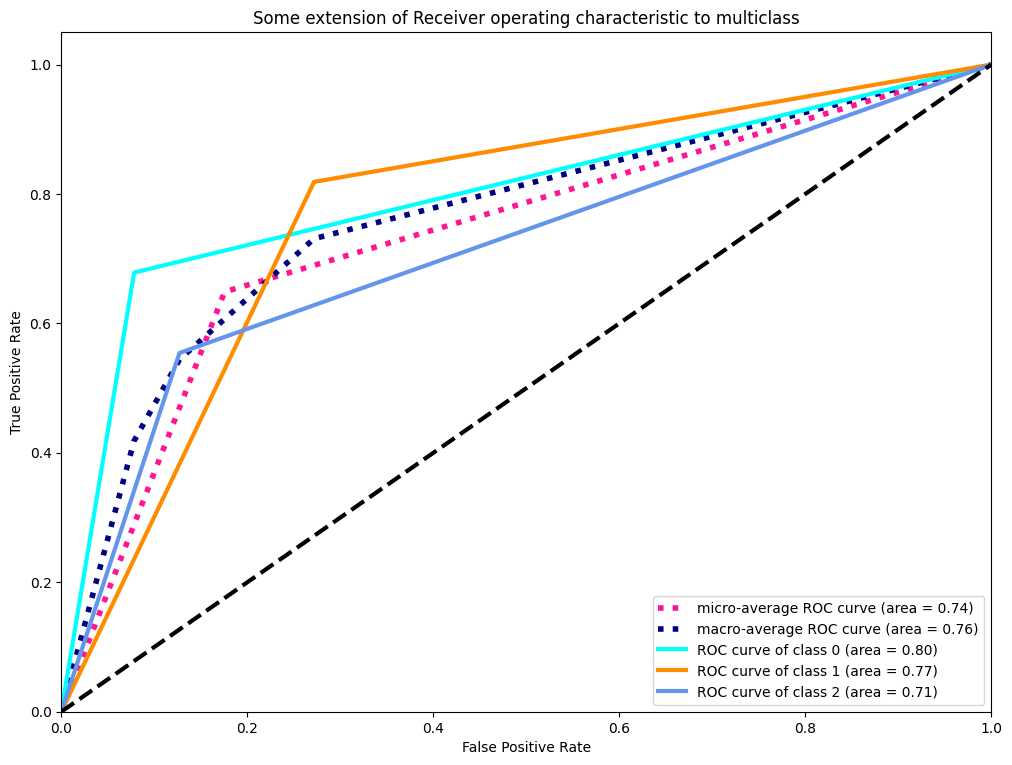

In [17]:
#code taken from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
lw = 3
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
figure(figsize=(12,9),dpi=100)

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/AI_2/ROC_6_GRU_final.png')
plt.show()

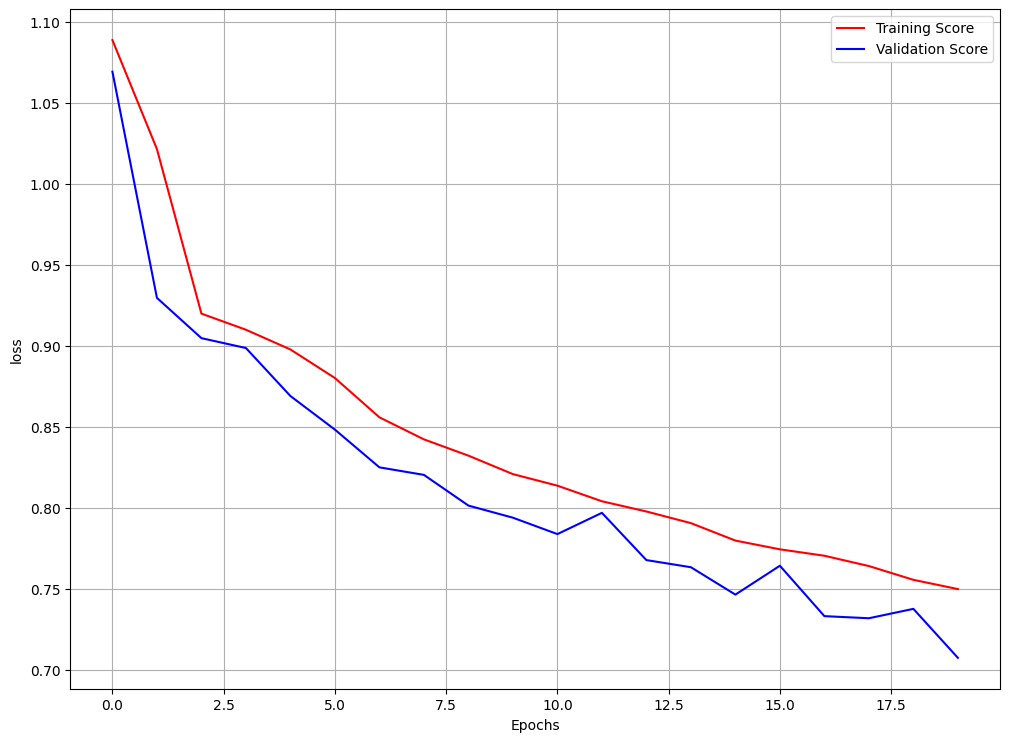

In [18]:
figure(figsize=(12,9),dpi=100)
plt.plot(epochs,train_loss,'r',label='Training Score',)
plt.plot(epochs,validation_loss,'b',label='Validation Score')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/AI_2/train_val_6_GRU_final.png')
plt.legend()

